In [1]:
import sys
sys.path.append("../../..")

from pathlib import Path

from src.dataset_tools.transforms import DatasetDeduplicator

d:\My_Files\Projects\nn\ProdEye\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
deduplicator = DatasetDeduplicator.from_yaml("../../../datasets/processed/v1/data.yaml")

 100% |███████████████| 1829/1829 [1.7s elapsed, 0s remaining, 1.1K samples/s]         
 100% |█████████████████| 409/409 [369.9ms elapsed, 0s remaining, 1.1K samples/s]     


In [3]:
duplicates = deduplicator.find_duplicates(
    threshold=0.05,
    batch_size=128,
)

Computing embeddings...
  11% |█/-------------|  256/2238 [6.6s elapsed, 51.0s remaining, 38.9 samples/s] 

d:\My_Files\Projects\nn\ProdEye\.venv\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


  51% |███████|-------| 1152/2238 [26.7s elapsed, 25.2s remaining, 43.2 samples/s] 

d:\My_Files\Projects\nn\ProdEye\.venv\lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


 100% |███████████████| 2238/2238 [52.8s elapsed, 0s remaining, 41.6 samples/s]    
Computing duplicate samples...
Duplicates computation complete
Computing duplicate samples...
Duplicates computation complete


In [4]:
def last_parts(path: str, parts: int = 3) -> str:
    last_parts = Path(path).parts[-parts:]
    return "/".join(last_parts)


COUNT = 15
for orig, dups in list(duplicates.items())[:COUNT]:
    print(f'{last_parts(orig)}: {list(map(lambda p: last_parts(p), dups))}')

train/images/cucumber_117.jpg: ['train/images/cucumber_68.jpg']
train/images/grape_188.jpg: ['train/images/grape_77.jpg']
train/images/orange_176.jpg: ['train/images/orange_46.jpg']
train/images/orange_61.jpg: ['train/images/orange_84.jpg', 'train/images/orange_68.jpg']
train/images/tomato_73.jpg: ['train/images/tomato_93.jpg']
train/images/watermelon_122.jpg: ['train/images/watermelon_128.jpg']
train/images/watermelon_207.jpg: ['train/images/watermelon_29.jpg']
valid/images/orange_33.jpg: ['valid/images/orange_85.jpg']
train/images/pear_127.jpg: ['valid/images/pear_80.jpg']
train/images/pineapple_57.jpg: ['valid/images/pineapple_138.jpg']
train/images/potato_167.jpg: ['valid/images/potato_172.jpg']


Retrieving embeddings from similarity index...


Generating visualization...
UMAP( verbose=True)
Wed Dec 10 16:49:53 2025 Construct fuzzy simplicial set
Wed Dec 10 16:49:54 2025 Finding Nearest Neighbors
Wed Dec 10 16:49:58 2025 Finished Nearest Neighbor Search
Wed Dec 10 16:50:00 2025 Construct embedding


Epochs completed:  21%| ██         104/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs


Epochs completed:  81%| ████████▏  407/500 [00:01]

	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:01]

Wed Dec 10 16:50:02 2025 Finished embedding
Generating spatial index in field 'duplicate_embeddings'...
   0% ||--------------|    1/2238 [1.6ms elapsed, 3.6s remaining, 618.6 samples/s] 

 100% |███████████████| 2238/2238 [87.1ms elapsed, 0s remaining, 25.7K samples/s]  



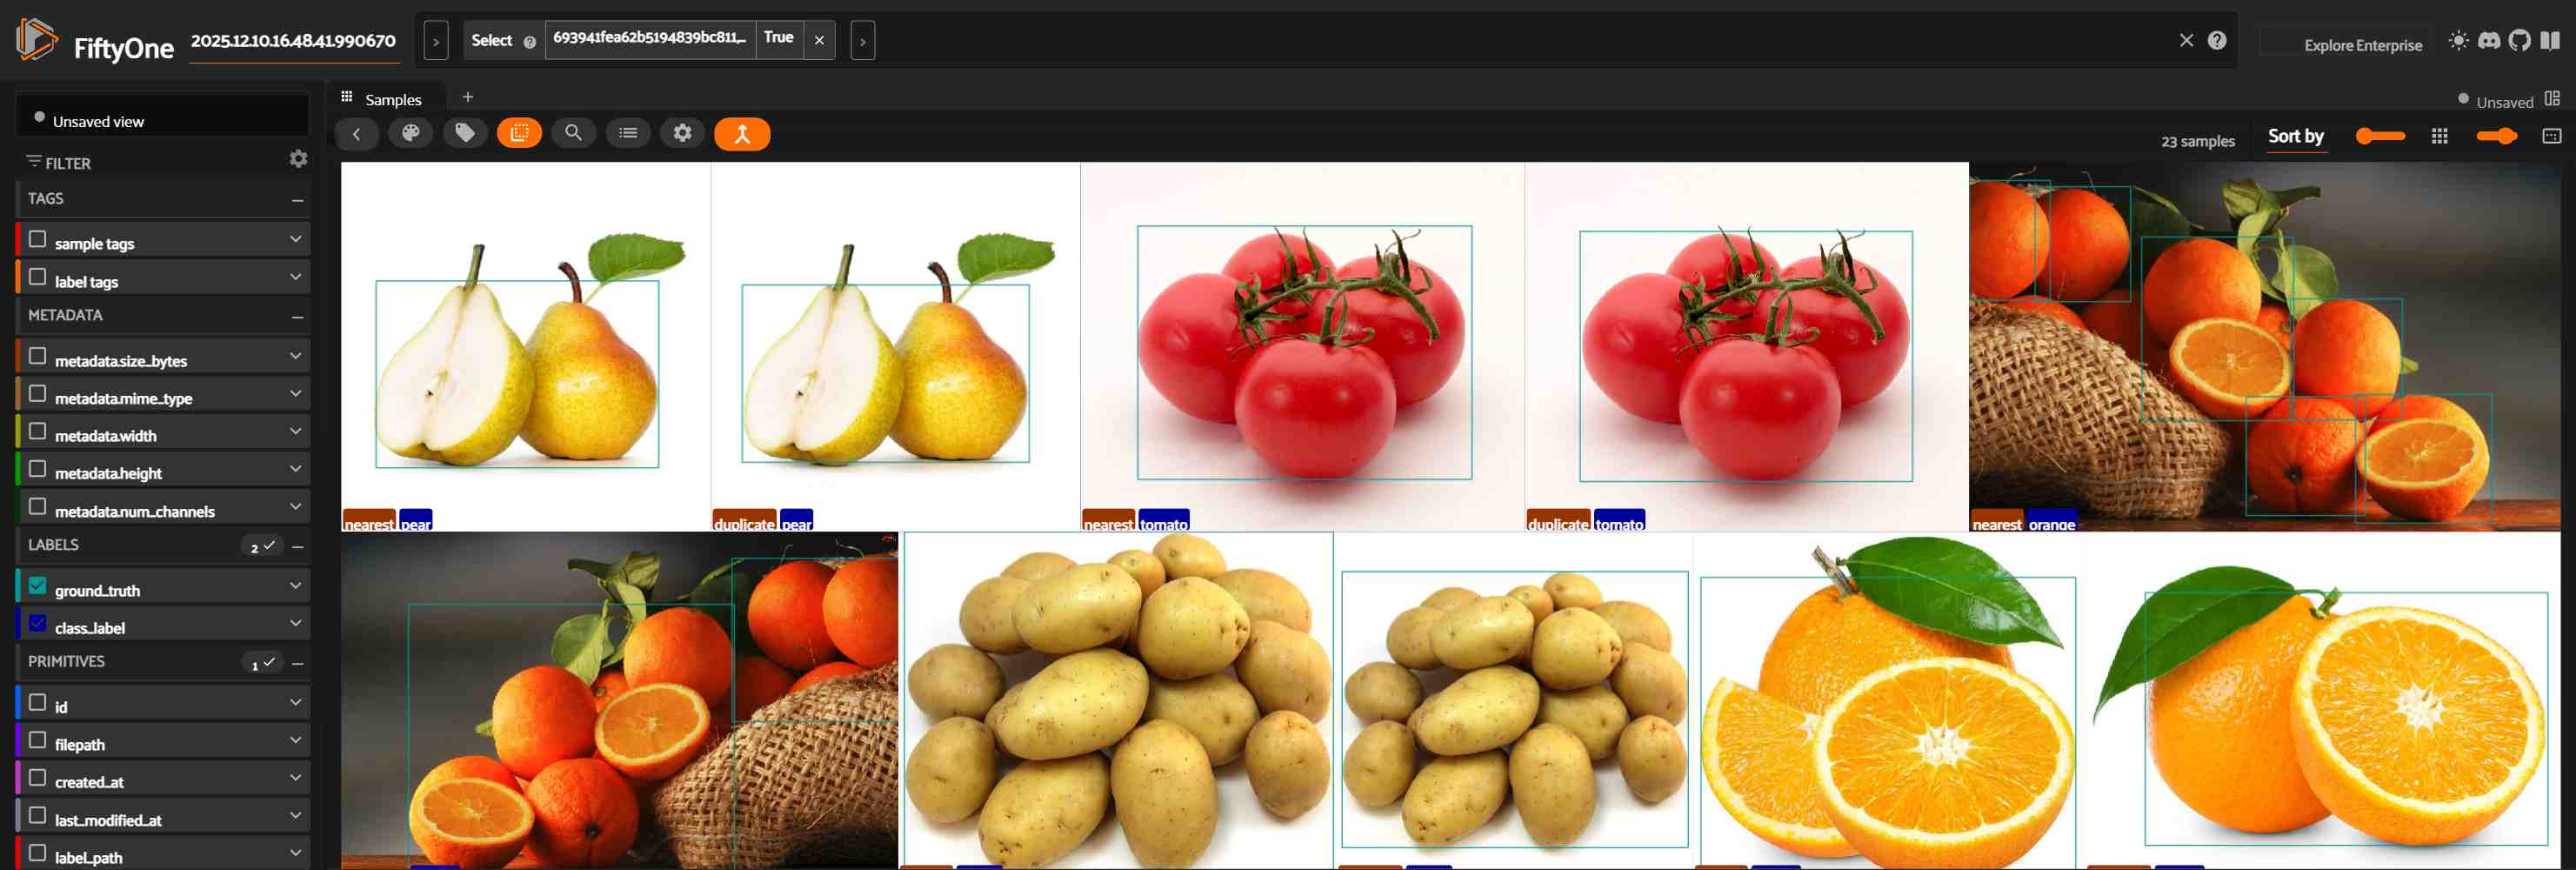

In [5]:
session = deduplicator.visualize_duplicates(compute_visualization=True)

In [ ]:
session.freeze()

In [7]:
deduplicator.delete_duplicates()

[('D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\images\\cucumber_68.jpg',
  'D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\labels\\cucumber_68.txt'),
 ('D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\images\\grape_77.jpg',
  'D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\labels\\grape_77.txt'),
 ('D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\images\\orange_46.jpg',
  'D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\labels\\orange_46.txt'),
 ('D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\images\\orange_68.jpg',
  'D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\labels\\orange_68.txt'),
 ('D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\images\\orange_84.jpg',
  'D:\\My_Files\\Projects\\nn\\ProdEye\\datasets\\processed\\v1\\train\\labels\\orange_84.txt'),
 ('D:\\My_Files\\Projects\\nn\\Pr